In [92]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

In [93]:
train = pd.read_csv('./data/training.csv')

In [94]:
unemp = train[train['INDICATOR'] == "Unemployment"]
rgdp = train[train['INDICATOR'] == "RealGDP"]
cpce = train[train['INDICATOR'] == "Core PCE"]
ccpi = train[train['INDICATOR'] == "Core CPI"]
ngnp = train[train['INDICATOR'] == "NominalGNP"]
rgnp = train[train['INDICATOR'] == "RealGNP"]

In [95]:
np.random.seed(0)
def model_setup(df):
    
    rand = df.sample(frac = 1)
    #80/20 split
    nrow = len(rand)
    train_prop = int(np.round(nrow*0.8))
    train = rand[:train_prop]
    val = rand[train_prop:]

    #filling na with 0 bc they replaced 0s with na in the original R code but we should definitely look into this more
    train = train.fillna(0)
    val = val.fillna(0)

    X_train, Y_train = train[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_BIN", "ACTUAL_CONF"]], train[["actual"]]
    X_val, Y_val = val[["FORECASTER ID", "INDUSTRY", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_BIN", "ACTUAL_CONF"]], val[["actual"]]
    
    return X_train, Y_train, X_val, Y_val

In [96]:
rgdp.sort_values(by=['YEAR FORECAST MADE'])

,YEAR FORECAST MADE,QUARTER,YEAR BEING FORECAST,INDICATOR,FORECASTER ID,INDUSTRY,Year.ID.ForecastYear.Quarter,Indicator.Year.ID.ForecastYear.Quarter,BIN 1,BIN 2,...,bin_value_sum,TDIST,actual,ACTUAL_BIN,MAX,NUM_OF_MAX,ACTUAL_CONF,HIT,pred_average,pred_var
2511,1992,1,1992,RealGDP,404,2.0,1992-404-1992-1,RealGDP-1992-404-1992-1,0.0,0.0,...,100.0,0.75,3.52244,4.0,0.50,1.0,0.00,0.0,1.60,0.4900
2608,1992,3,1993,RealGDP,94,1.0,1993-94-1992-3,RealGDP-1993-94-1992-3,0.0,0.0,...,100.0,1.25,2.75285,5.0,0.40,1.0,0.40,1.0,1.90,1.3400
2609,1992,3,1993,RealGDP,65,1.0,1993-65-1992-3,RealGDP-1993-65-1992-3,NaN,NaN,...,NaN,1.25,2.75285,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2610,1992,3,1993,RealGDP,408,1.0,1993-408-1992-3,RealGDP-1993-408-1992-3,0.0,0.0,...,100.0,1.25,2.75285,5.0,0.50,1.0,0.50,1.0,2.60,0.7900
2611,1992,3,1993,RealGDP,427,1.0,1993-427-1992-3,RealGDP-1993-427-1992-3,0.0,5.0,...,100.0,1.25,2.75285,5.0,0.25,2.0,0.25,0.5,2.00,2.6500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15915,2019,1,2021,RealGDP,577,2.0,2021-577-2019-1,RealGDP-2021-577-2019-1,NaN,NaN,...,NaN,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15916,2019,1,2021,RealGDP,586,2.0,2021-586-2019-1,RealGDP-2021-586-2019-1,NaN,NaN,...,NaN,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15917,2019,1,2021,RealGDP,579,1.0,2021-579-2019-1,RealGDP-2021-579-2019-1,NaN,NaN,...,NaN,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15910,2019,1,2021,RealGDP,508,2.0,2021-508-2019-1,RealGDP-2021-508-2019-1,0.0,0.0,...,100.0,2.75,NaN,NaN,0.40,1.0,NaN,NaN,1.65,0.7275


In [97]:
rgdp = rgdp[['YEAR BEING FORECAST',"MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF","actual"]]

In [98]:
df = rgdp.groupby(['YEAR BEING FORECAST']).mean()

In [99]:
df

,MAX,pred_average,pred_var,HIT,ACTUAL_CONF,actual
YEAR BEING FORECAST,,,,,,
1992,0.614225,1.816056,0.530003,0.021127,0.063239,3.52244
1993,0.565029,2.675572,0.782419,0.673913,0.482768,2.75285
1994,0.582117,3.187117,0.642817,0.025210,0.129428,4.02883
1995,0.561094,2.889964,0.820154,0.510870,0.388224,2.68428
1996,0.561796,2.274618,0.892698,0.051535,0.139105,3.77250
1997,0.560777,2.532264,0.815398,0.006944,0.052153,4.44722
1998,0.546284,2.650824,0.979993,0.000000,0.041577,4.48141
1999,0.539448,2.866259,0.812966,0.084000,0.144088,4.75324
2000,0.545073,3.533772,0.838833,0.154472,0.195650,4.12748


<Figure size 432x288 with 0 Axes>

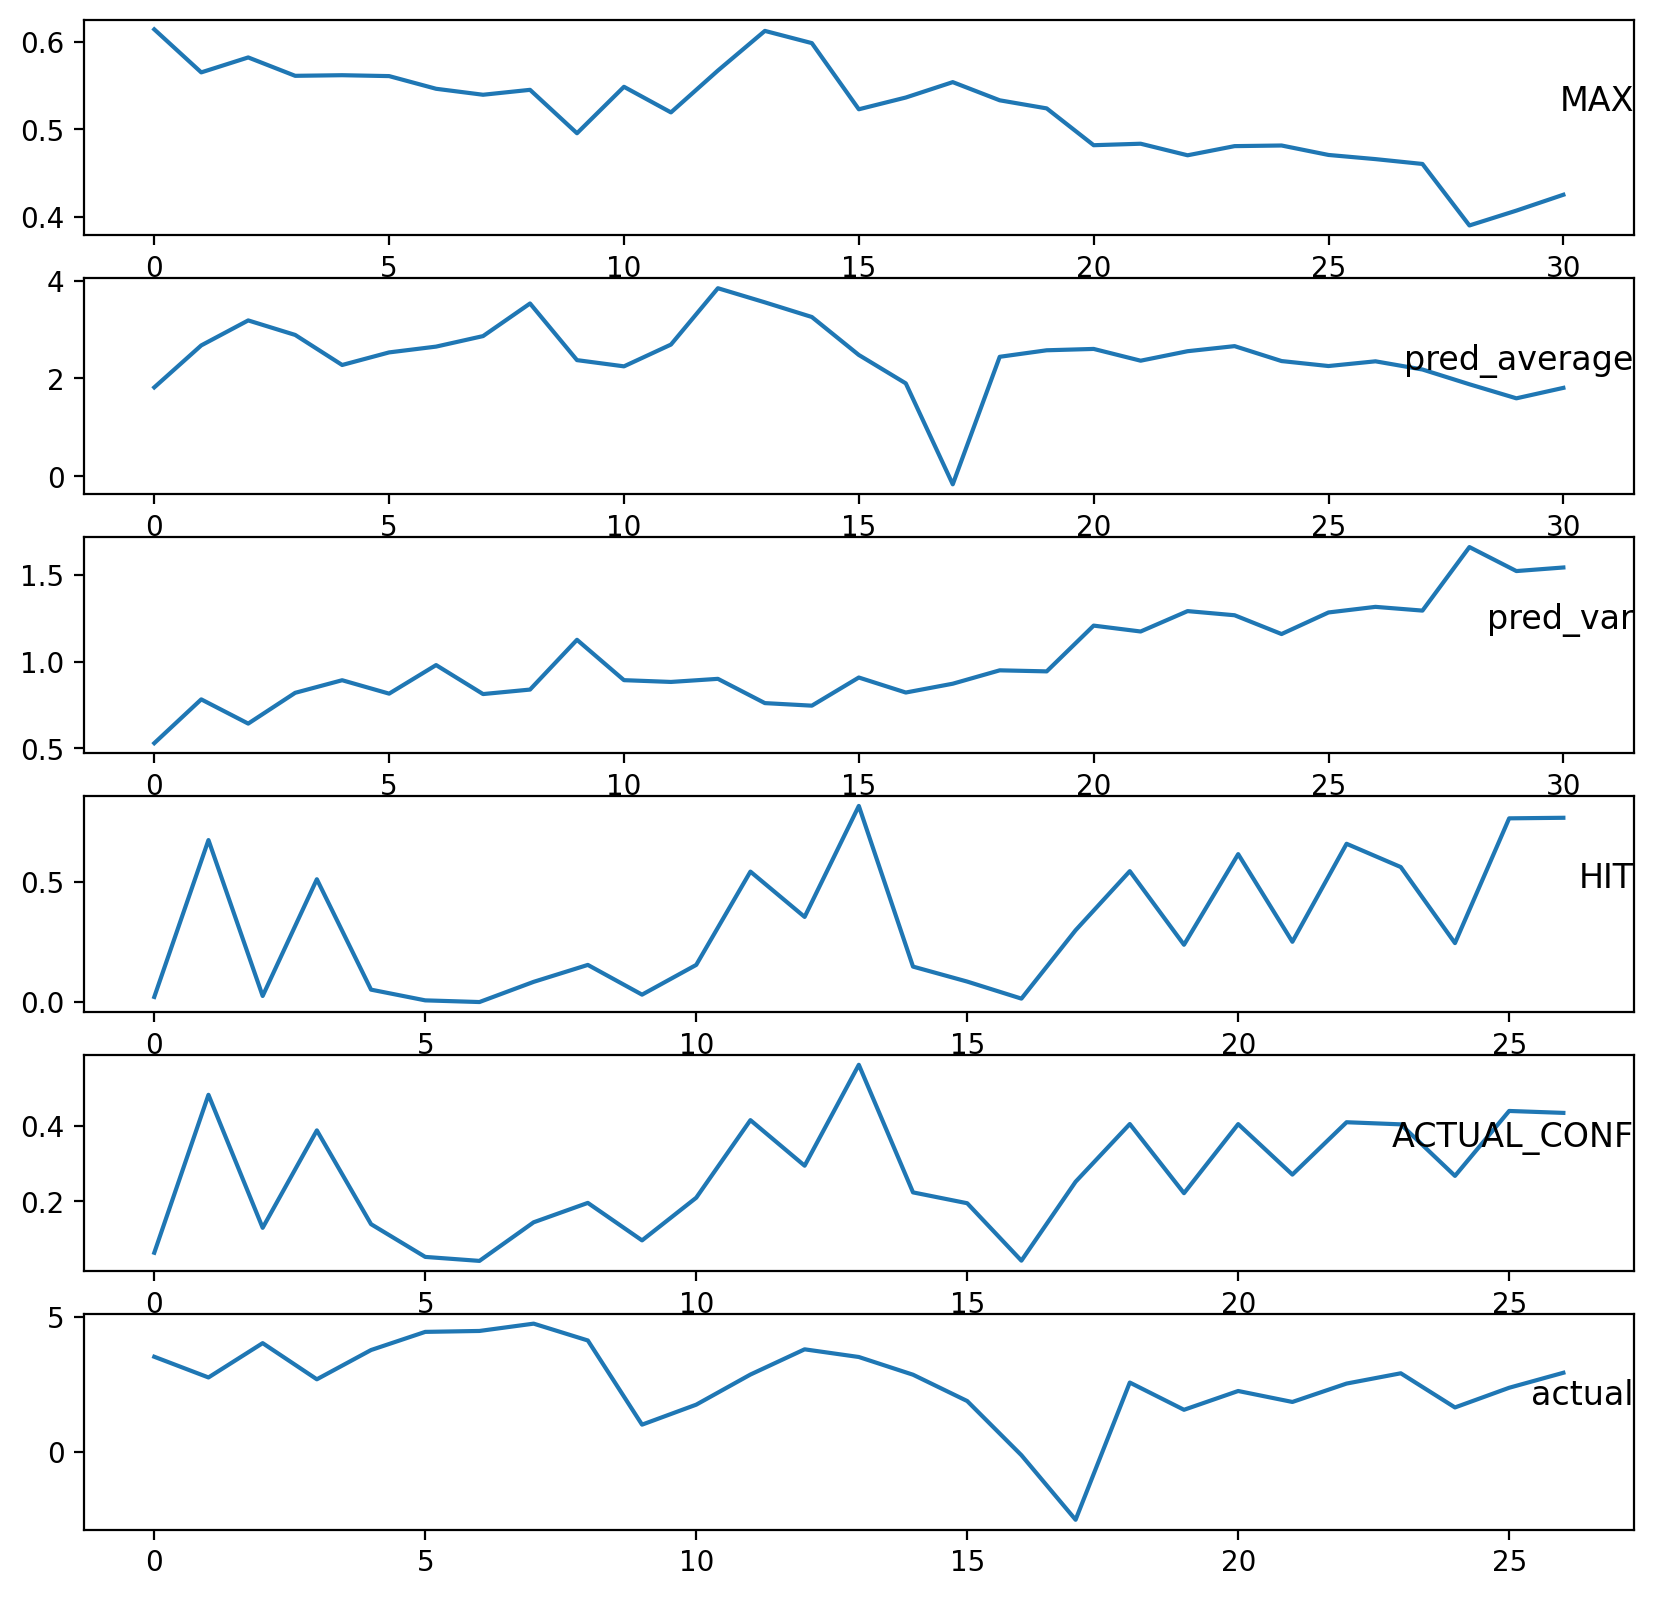

In [100]:
groups = [0, 1, 2, 3,4, 5]
i = 1
values = df.values
pyplot.figure()
figure(figsize=(10, 10), dpi=200)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1  
pyplot.show()

In [101]:
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [102]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [103]:
# ensure all data is float
values = values.astype('float32')
# frame as supervised learning
reframed = series_to_supervised(values, 10, 1)

print(reframed)

    var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var6(t-10)  \
10    0.614225    1.816056    0.530003    0.021127    0.063239     3.52244   
11    0.565029    2.675572    0.782419    0.673913    0.482768     2.75285   
12    0.582117    3.187117    0.642817    0.025210    0.129428     4.02883   
13    0.561094    2.889964    0.820154    0.510870    0.388224     2.68428   
14    0.561796    2.274618    0.892698    0.051535    0.139105     3.77250   
15    0.560777    2.532264    0.815398    0.006944    0.052153     4.44722   
16    0.546284    2.650824    0.979993    0.000000    0.041577     4.48141   
17    0.539448    2.866259    0.812966    0.084000    0.144088     4.75324   
18    0.545073    3.533772    0.838833    0.154472    0.195650     4.12748   
19    0.495439    2.374105    1.125547    0.030702    0.096009     0.99835   
20    0.548547    2.246880    0.893046    0.154558    0.209402     1.74170   
21    0.519268    2.692520    0.882816    0.542683    0.415447  

In [48]:
# split into train and test sets
values = reframed.values
train_num = 20
train = values[:train_num, :]
test = values[train_num:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(20, 1, 29) (20,) (3, 1, 29) (3,)


In [49]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(train_X, train_y, 
                    epochs=1000, 
                    batch_size=32, 
                    validation_data=(test_X, test_y), 
                    verbose=2, 
                    shuffle=False)

Epoch 1/1000
1/1 - 0s - loss: 8.5357 - val_loss: 4.0395
Epoch 2/1000
1/1 - 0s - loss: 7.9639 - val_loss: 3.5648
Epoch 3/1000
1/1 - 0s - loss: 7.4216 - val_loss: 3.1188
Epoch 4/1000
1/1 - 0s - loss: 6.9077 - val_loss: 2.7004
Epoch 5/1000
1/1 - 0s - loss: 6.4213 - val_loss: 2.3096
Epoch 6/1000
1/1 - 0s - loss: 5.9617 - val_loss: 1.9470
Epoch 7/1000
1/1 - 0s - loss: 5.5288 - val_loss: 1.6140
Epoch 8/1000
1/1 - 0s - loss: 5.1234 - val_loss: 1.3121
Epoch 9/1000
1/1 - 0s - loss: 4.7464 - val_loss: 1.0428
Epoch 10/1000
1/1 - 0s - loss: 4.3988 - val_loss: 0.8081
Epoch 11/1000
1/1 - 0s - loss: 4.0820 - val_loss: 0.6095
Epoch 12/1000
1/1 - 0s - loss: 3.7975 - val_loss: 0.4485
Epoch 13/1000
1/1 - 0s - loss: 3.5464 - val_loss: 0.3262
Epoch 14/1000
1/1 - 0s - loss: 3.3299 - val_loss: 0.2430
Epoch 15/1000
1/1 - 0s - loss: 3.1487 - val_loss: 0.1984
Epoch 16/1000
1/1 - 0s - loss: 3.0027 - val_loss: 0.1909
Epoch 17/1000
1/1 - 0s - loss: 2.8911 - val_loss: 0.2173
Epoch 18/1000
1/1 - 0s - loss: 2.8120 - 

1/1 - 0s - loss: 0.5596 - val_loss: 0.3217
Epoch 145/1000
1/1 - 0s - loss: 0.5505 - val_loss: 0.3206
Epoch 146/1000
1/1 - 0s - loss: 0.5415 - val_loss: 0.3196
Epoch 147/1000
1/1 - 0s - loss: 0.5326 - val_loss: 0.3186
Epoch 148/1000
1/1 - 0s - loss: 0.5239 - val_loss: 0.3174
Epoch 149/1000
1/1 - 0s - loss: 0.5152 - val_loss: 0.3161
Epoch 150/1000
1/1 - 0s - loss: 0.5067 - val_loss: 0.3148
Epoch 151/1000
1/1 - 0s - loss: 0.4983 - val_loss: 0.3134
Epoch 152/1000
1/1 - 0s - loss: 0.4900 - val_loss: 0.3121
Epoch 153/1000
1/1 - 0s - loss: 0.4818 - val_loss: 0.3110
Epoch 154/1000
1/1 - 0s - loss: 0.4737 - val_loss: 0.3100
Epoch 155/1000
1/1 - 0s - loss: 0.4658 - val_loss: 0.3091
Epoch 156/1000
1/1 - 0s - loss: 0.4579 - val_loss: 0.3082
Epoch 157/1000
1/1 - 0s - loss: 0.4502 - val_loss: 0.3073
Epoch 158/1000
1/1 - 0s - loss: 0.4426 - val_loss: 0.3063
Epoch 159/1000
1/1 - 0s - loss: 0.4352 - val_loss: 0.3052
Epoch 160/1000
1/1 - 0s - loss: 0.4278 - val_loss: 0.3043
Epoch 161/1000
1/1 - 0s - los

Epoch 286/1000
1/1 - 0s - loss: 0.0145 - val_loss: 0.1609
Epoch 287/1000
1/1 - 0s - loss: 0.0139 - val_loss: 0.1600
Epoch 288/1000
1/1 - 0s - loss: 0.0134 - val_loss: 0.1591
Epoch 289/1000
1/1 - 0s - loss: 0.0129 - val_loss: 0.1582
Epoch 290/1000
1/1 - 0s - loss: 0.0124 - val_loss: 0.1573
Epoch 291/1000
1/1 - 0s - loss: 0.0119 - val_loss: 0.1565
Epoch 292/1000
1/1 - 0s - loss: 0.0114 - val_loss: 0.1557
Epoch 293/1000
1/1 - 0s - loss: 0.0110 - val_loss: 0.1549
Epoch 294/1000
1/1 - 0s - loss: 0.0106 - val_loss: 0.1542
Epoch 295/1000
1/1 - 0s - loss: 0.0101 - val_loss: 0.1535
Epoch 296/1000
1/1 - 0s - loss: 0.0098 - val_loss: 0.1528
Epoch 297/1000
1/1 - 0s - loss: 0.0094 - val_loss: 0.1521
Epoch 298/1000
1/1 - 0s - loss: 0.0090 - val_loss: 0.1514
Epoch 299/1000
1/1 - 0s - loss: 0.0087 - val_loss: 0.1508
Epoch 300/1000
1/1 - 0s - loss: 0.0083 - val_loss: 0.1501
Epoch 301/1000
1/1 - 0s - loss: 0.0080 - val_loss: 0.1495
Epoch 302/1000
1/1 - 0s - loss: 0.0077 - val_loss: 0.1489
Epoch 303/1000

Epoch 423/1000
1/1 - 0s - loss: 1.0743e-04 - val_loss: 0.1360
Epoch 424/1000
1/1 - 0s - loss: 1.0401e-04 - val_loss: 0.1360
Epoch 425/1000
1/1 - 0s - loss: 1.0069e-04 - val_loss: 0.1360
Epoch 426/1000
1/1 - 0s - loss: 9.7485e-05 - val_loss: 0.1360
Epoch 427/1000
1/1 - 0s - loss: 9.4378e-05 - val_loss: 0.1359
Epoch 428/1000
1/1 - 0s - loss: 9.1368e-05 - val_loss: 0.1359
Epoch 429/1000
1/1 - 0s - loss: 8.8452e-05 - val_loss: 0.1359
Epoch 430/1000
1/1 - 0s - loss: 8.5626e-05 - val_loss: 0.1359
Epoch 431/1000
1/1 - 0s - loss: 8.2892e-05 - val_loss: 0.1359
Epoch 432/1000
1/1 - 0s - loss: 8.0241e-05 - val_loss: 0.1359
Epoch 433/1000
1/1 - 0s - loss: 7.7674e-05 - val_loss: 0.1359
Epoch 434/1000
1/1 - 0s - loss: 7.5190e-05 - val_loss: 0.1359
Epoch 435/1000
1/1 - 0s - loss: 7.2782e-05 - val_loss: 0.1359
Epoch 436/1000
1/1 - 0s - loss: 7.0450e-05 - val_loss: 0.1359
Epoch 437/1000
1/1 - 0s - loss: 6.8193e-05 - val_loss: 0.1358
Epoch 438/1000
1/1 - 0s - loss: 6.6006e-05 - val_loss: 0.1358
Epoch 43

1/1 - 0s - loss: 1.1192e-06 - val_loss: 0.1351
Epoch 556/1000
1/1 - 0s - loss: 1.0778e-06 - val_loss: 0.1351
Epoch 557/1000
1/1 - 0s - loss: 1.0380e-06 - val_loss: 0.1351
Epoch 558/1000
1/1 - 0s - loss: 9.9967e-07 - val_loss: 0.1351
Epoch 559/1000
1/1 - 0s - loss: 9.6246e-07 - val_loss: 0.1351
Epoch 560/1000
1/1 - 0s - loss: 9.2684e-07 - val_loss: 0.1351
Epoch 561/1000
1/1 - 0s - loss: 8.9231e-07 - val_loss: 0.1351
Epoch 562/1000
1/1 - 0s - loss: 8.5892e-07 - val_loss: 0.1351
Epoch 563/1000
1/1 - 0s - loss: 8.2702e-07 - val_loss: 0.1351
Epoch 564/1000
1/1 - 0s - loss: 7.9603e-07 - val_loss: 0.1351
Epoch 565/1000
1/1 - 0s - loss: 7.6639e-07 - val_loss: 0.1351
Epoch 566/1000
1/1 - 0s - loss: 7.3753e-07 - val_loss: 0.1351
Epoch 567/1000
1/1 - 0s - loss: 7.1007e-07 - val_loss: 0.1351
Epoch 568/1000
1/1 - 0s - loss: 6.8335e-07 - val_loss: 0.1351
Epoch 569/1000
1/1 - 0s - loss: 6.5756e-07 - val_loss: 0.1351
Epoch 570/1000
1/1 - 0s - loss: 6.3291e-07 - val_loss: 0.1351
Epoch 571/1000
1/1 - 0s

Epoch 688/1000
1/1 - 0s - loss: 4.5932e-09 - val_loss: 0.1350
Epoch 689/1000
1/1 - 0s - loss: 4.3931e-09 - val_loss: 0.1350
Epoch 690/1000
1/1 - 0s - loss: 4.1885e-09 - val_loss: 0.1350
Epoch 691/1000
1/1 - 0s - loss: 4.0002e-09 - val_loss: 0.1350
Epoch 692/1000
1/1 - 0s - loss: 3.8283e-09 - val_loss: 0.1350
Epoch 693/1000
1/1 - 0s - loss: 3.6500e-09 - val_loss: 0.1350
Epoch 694/1000
1/1 - 0s - loss: 3.4965e-09 - val_loss: 0.1350
Epoch 695/1000
1/1 - 0s - loss: 3.3371e-09 - val_loss: 0.1350
Epoch 696/1000
1/1 - 0s - loss: 3.1768e-09 - val_loss: 0.1350
Epoch 697/1000
1/1 - 0s - loss: 3.0523e-09 - val_loss: 0.1350
Epoch 698/1000
1/1 - 0s - loss: 2.9029e-09 - val_loss: 0.1350
Epoch 699/1000
1/1 - 0s - loss: 2.7878e-09 - val_loss: 0.1350
Epoch 700/1000
1/1 - 0s - loss: 2.6660e-09 - val_loss: 0.1350
Epoch 701/1000
1/1 - 0s - loss: 2.5332e-09 - val_loss: 0.1350
Epoch 702/1000
1/1 - 0s - loss: 2.4221e-09 - val_loss: 0.1350
Epoch 703/1000
1/1 - 0s - loss: 2.3169e-09 - val_loss: 0.1350
Epoch 70

1/1 - 0s - loss: 7.4137e-12 - val_loss: 0.1350
Epoch 821/1000
1/1 - 0s - loss: 7.7773e-12 - val_loss: 0.1350
Epoch 822/1000
1/1 - 0s - loss: 7.1033e-12 - val_loss: 0.1350
Epoch 823/1000
1/1 - 0s - loss: 6.8307e-12 - val_loss: 0.1350
Epoch 824/1000
1/1 - 0s - loss: 6.5891e-12 - val_loss: 0.1350
Epoch 825/1000
1/1 - 0s - loss: 6.7392e-12 - val_loss: 0.1350
Epoch 826/1000
1/1 - 0s - loss: 6.1829e-12 - val_loss: 0.1350
Epoch 827/1000
1/1 - 0s - loss: 5.9146e-12 - val_loss: 0.1350
Epoch 828/1000
1/1 - 0s - loss: 5.8494e-12 - val_loss: 0.1350
Epoch 829/1000
1/1 - 0s - loss: 4.9932e-12 - val_loss: 0.1350
Epoch 830/1000
1/1 - 0s - loss: 4.6882e-12 - val_loss: 0.1350
Epoch 831/1000
1/1 - 0s - loss: 4.7715e-12 - val_loss: 0.1350
Epoch 832/1000
1/1 - 0s - loss: 4.4206e-12 - val_loss: 0.1350
Epoch 833/1000
1/1 - 0s - loss: 4.3441e-12 - val_loss: 0.1350
Epoch 834/1000
1/1 - 0s - loss: 4.3636e-12 - val_loss: 0.1350
Epoch 835/1000
1/1 - 0s - loss: 3.8197e-12 - val_loss: 0.1350
Epoch 836/1000
1/1 - 0s

Epoch 953/1000
1/1 - 0s - loss: 1.0517e-13 - val_loss: 0.1350
Epoch 954/1000
1/1 - 0s - loss: 1.9078e-13 - val_loss: 0.1350
Epoch 955/1000
1/1 - 0s - loss: 1.7781e-13 - val_loss: 0.1350
Epoch 956/1000
1/1 - 0s - loss: 1.7605e-13 - val_loss: 0.1350
Epoch 957/1000
1/1 - 0s - loss: 2.0468e-13 - val_loss: 0.1350
Epoch 958/1000
1/1 - 0s - loss: 1.3937e-13 - val_loss: 0.1350
Epoch 959/1000
1/1 - 0s - loss: 1.1124e-13 - val_loss: 0.1350
Epoch 960/1000
1/1 - 0s - loss: 1.7089e-13 - val_loss: 0.1350
Epoch 961/1000
1/1 - 0s - loss: 1.2528e-13 - val_loss: 0.1350
Epoch 962/1000
1/1 - 0s - loss: 3.0332e-13 - val_loss: 0.1350
Epoch 963/1000
1/1 - 0s - loss: 1.0348e-13 - val_loss: 0.1350
Epoch 964/1000
1/1 - 0s - loss: 3.3880e-13 - val_loss: 0.1350
Epoch 965/1000
1/1 - 0s - loss: 4.7492e-13 - val_loss: 0.1350
Epoch 966/1000
1/1 - 0s - loss: 1.7768e-13 - val_loss: 0.1350
Epoch 967/1000
1/1 - 0s - loss: 1.7395e-13 - val_loss: 0.1350
Epoch 968/1000
1/1 - 0s - loss: 3.0429e-13 - val_loss: 0.1350
Epoch 96

In [50]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [51]:
print('Test MSE: ' + str(mean_squared_error(yhat, test_X[:, -1])))

Test MSE: 3.3682058


In [88]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# frame as supervised learning
reframed = series_to_supervised(values, 10, 1)

# split into train and test sets
values = reframed.values
train_num = 20
train = values[:train_num, :]
test = values[train_num:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model1 = Sequential()
model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dense(8))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')
# fit network
model1.fit(train_X, train_y, 
                    epochs=800, 
                    batch_size=32, 
                    validation_data=(test_X, test_y), 
                    verbose=2, 
                    shuffle=False)


Epoch 1/800
1/1 - 0s - loss: 8.2492
Epoch 2/800
1/1 - 0s - loss: 6.9960
Epoch 3/800
1/1 - 0s - loss: 5.8848
Epoch 4/800
1/1 - 0s - loss: 4.9173
Epoch 5/800
1/1 - 0s - loss: 4.0928
Epoch 6/800
1/1 - 0s - loss: 3.4081
Epoch 7/800
1/1 - 0s - loss: 2.8583
Epoch 8/800
1/1 - 0s - loss: 2.4364
Epoch 9/800
1/1 - 0s - loss: 2.1343
Epoch 10/800
1/1 - 0s - loss: 1.9412
Epoch 11/800
1/1 - 0s - loss: 1.8432
Epoch 12/800
1/1 - 0s - loss: 1.8226
Epoch 13/800
1/1 - 0s - loss: 1.8575
Epoch 14/800
1/1 - 0s - loss: 1.9232
Epoch 15/800
1/1 - 0s - loss: 1.9950
Epoch 16/800
1/1 - 0s - loss: 2.0529
Epoch 17/800
1/1 - 0s - loss: 2.0842
Epoch 18/800
1/1 - 0s - loss: 2.0842
Epoch 19/800
1/1 - 0s - loss: 2.0547
Epoch 20/800
1/1 - 0s - loss: 2.0015
Epoch 21/800
1/1 - 0s - loss: 1.9324
Epoch 22/800
1/1 - 0s - loss: 1.8555
Epoch 23/800
1/1 - 0s - loss: 1.7779
Epoch 24/800
1/1 - 0s - loss: 1.7053
Epoch 25/800
1/1 - 0s - loss: 1.6416
Epoch 26/800
1/1 - 0s - loss: 1.5889
Epoch 27/800
1/1 - 0s - loss: 1.5475
Epoch 28/8

Epoch 214/800
1/1 - 0s - loss: 8.2910e-06
Epoch 215/800
1/1 - 0s - loss: 7.4860e-06
Epoch 216/800
1/1 - 0s - loss: 6.7542e-06
Epoch 217/800
1/1 - 0s - loss: 6.0908e-06
Epoch 218/800
1/1 - 0s - loss: 5.4905e-06
Epoch 219/800
1/1 - 0s - loss: 4.9463e-06
Epoch 220/800
1/1 - 0s - loss: 4.4537e-06
Epoch 221/800
1/1 - 0s - loss: 4.0073e-06
Epoch 222/800
1/1 - 0s - loss: 3.6039e-06
Epoch 223/800
1/1 - 0s - loss: 3.2382e-06
Epoch 224/800
1/1 - 0s - loss: 2.9073e-06
Epoch 225/800
1/1 - 0s - loss: 2.6080e-06
Epoch 226/800
1/1 - 0s - loss: 2.3374e-06
Epoch 227/800
1/1 - 0s - loss: 2.0935e-06
Epoch 228/800
1/1 - 0s - loss: 1.8732e-06
Epoch 229/800
1/1 - 0s - loss: 1.6750e-06
Epoch 230/800
1/1 - 0s - loss: 1.4967e-06
Epoch 231/800
1/1 - 0s - loss: 1.3372e-06
Epoch 232/800
1/1 - 0s - loss: 1.1933e-06
Epoch 233/800
1/1 - 0s - loss: 1.0646e-06
Epoch 234/800
1/1 - 0s - loss: 9.4885e-07
Epoch 235/800
1/1 - 0s - loss: 8.4498e-07
Epoch 236/800
1/1 - 0s - loss: 7.5169e-07
Epoch 237/800
1/1 - 0s - loss: 6.6

1/1 - 0s - loss: 3.1818e-14
Epoch 410/800
1/1 - 0s - loss: 2.3406e-14
Epoch 411/800
1/1 - 0s - loss: 3.4482e-14
Epoch 412/800
1/1 - 0s - loss: 2.7638e-14
Epoch 413/800
1/1 - 0s - loss: 1.8443e-14
Epoch 414/800
1/1 - 0s - loss: 2.2204e-14
Epoch 415/800
1/1 - 0s - loss: 2.8435e-14
Epoch 416/800
1/1 - 0s - loss: 1.8391e-14
Epoch 417/800
1/1 - 0s - loss: 1.6105e-14
Epoch 418/800
1/1 - 0s - loss: 1.8090e-14
Epoch 419/800
1/1 - 0s - loss: 2.5822e-14
Epoch 420/800
1/1 - 0s - loss: 2.1734e-14
Epoch 421/800
1/1 - 0s - loss: 1.8025e-14
Epoch 422/800
1/1 - 0s - loss: 2.8474e-14
Epoch 423/800
1/1 - 0s - loss: 3.4482e-14
Epoch 424/800
1/1 - 0s - loss: 2.9258e-14
Epoch 425/800
1/1 - 0s - loss: 2.8474e-14
Epoch 426/800
1/1 - 0s - loss: 2.9310e-14
Epoch 427/800
1/1 - 0s - loss: 1.8443e-14
Epoch 428/800
1/1 - 0s - loss: 2.1747e-14
Epoch 429/800
1/1 - 0s - loss: 1.7568e-14
Epoch 430/800
1/1 - 0s - loss: 2.5091e-14
Epoch 431/800
1/1 - 0s - loss: 2.1747e-14
Epoch 432/800
1/1 - 0s - loss: 2.0911e-14
Epoch 

Epoch 605/800
1/1 - 0s - loss: 1.4224e-14
Epoch 606/800
1/1 - 0s - loss: 1.4263e-14
Epoch 607/800
1/1 - 0s - loss: 1.7607e-14
Epoch 608/800
1/1 - 0s - loss: 1.4263e-14
Epoch 609/800
1/1 - 0s - loss: 8.3724e-15
Epoch 610/800
1/1 - 0s - loss: 1.5373e-14
Epoch 611/800
1/1 - 0s - loss: 1.5517e-14
Epoch 612/800
1/1 - 0s - loss: 1.5517e-14
Epoch 613/800
1/1 - 0s - loss: 1.4015e-14
Epoch 614/800
1/1 - 0s - loss: 1.0880e-14
Epoch 615/800
1/1 - 0s - loss: 1.4420e-14
Epoch 616/800
1/1 - 0s - loss: 1.1076e-14
Epoch 617/800
1/1 - 0s - loss: 1.9697e-14
Epoch 618/800
1/1 - 0s - loss: 1.2552e-14
Epoch 619/800
1/1 - 0s - loss: 1.0867e-14
Epoch 620/800
1/1 - 0s - loss: 1.4211e-14
Epoch 621/800
1/1 - 0s - loss: 1.4211e-14
Epoch 622/800
1/1 - 0s - loss: 2.4242e-14
Epoch 623/800
1/1 - 0s - loss: 1.5047e-14
Epoch 624/800
1/1 - 0s - loss: 1.5047e-14
Epoch 625/800
1/1 - 0s - loss: 1.0358e-14
Epoch 626/800
1/1 - 0s - loss: 1.2448e-14
Epoch 627/800
1/1 - 0s - loss: 1.4955e-14
Epoch 628/800
1/1 - 0s - loss: 1.1

1/1 - 0s - loss: 1.4681e-14


In [89]:
values = values[:, :-1]
values = values.reshape((values.shape[0], 1, values.shape[1]))
full_data = model1.predict(values)

In [90]:
values = values.reshape((values.shape[0], values.shape[2]))
print('Test MSE: ' + str(mean_squared_error(full_data, values[:, -1])))

Test MSE: 4.808135


## Results:

### Using past N year data  | MSE

###                  1         |               7.1929007
###                  2         |               8.008803
###                  3         |               7.057167
###                  4         |               7.3516607
###                  5         |               6.8667445
###                  6         |               6.3571916
###                  7         |               5.9628043
###                  10       |               4.808135
